# Simple Linear Regression Model - ML 

In [5]:
# basic libraries need to be imported

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Libraries for Regression analysis 
from sklearn.model_selection import train_test_split  #for train test split 
from pandas.core.common import random_state           # for Random state
from sklearn.linear_model import LinearRegression     # for linear regression model
from sklearn.metrics import mean_squared_error, r2_score   # for finding measures for accuracy

In [9]:
# Load Data

df = pd.read_csv("Salary_Data.csv")

In [11]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


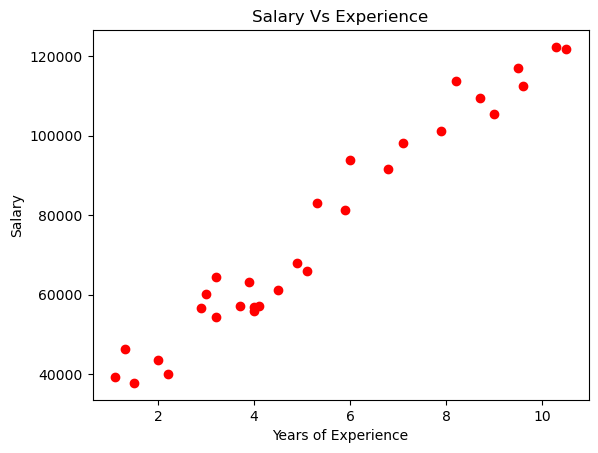

In [22]:
# Plotting the data

plt.scatter(df['YearsExperience'], df['Salary'], color = 'Red')
plt.title('Salary Vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [26]:
# Assigning the variable X and Y, X as independent Variable and Y as Dependent Variable
# Y = Salary
# X = Years of Experience
# Hypothesis will be Salary is dependent on year of experience
x = df.iloc[:, :1]  # independent
y = df.iloc[:, 1:]  # dependent

In [34]:
# Splitting of the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
# application of Regression Model
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred_test = reg.predict(x_test)     # predicted value of y_test
y_pred_train = reg.predict(x_train)   # predicted value of y_train

# Visualtization

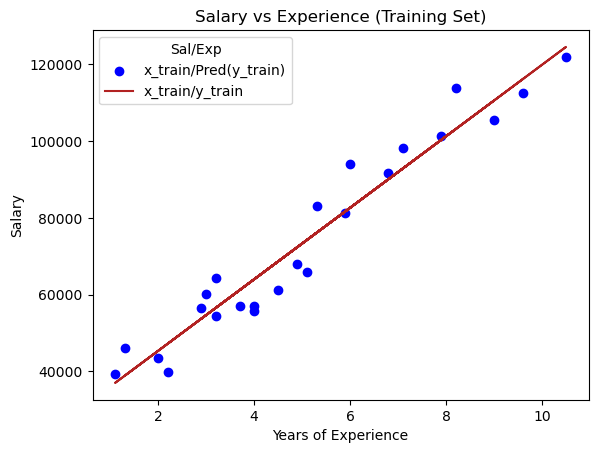

In [50]:
# Prediction on training set
plt.scatter(x_train, y_train, color = 'Blue')
plt.plot(x_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['x_train/Pred(y_train)', 'x_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.show()

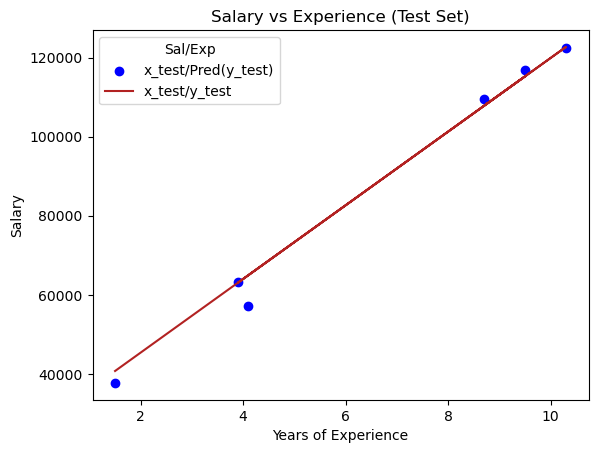

In [52]:
plt.scatter(x_test, y_test, color = 'Blue')
plt.plot(x_test, y_pred_test, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['x_test/Pred(y_test)', 'x_test/y_test'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.show()

# Statistical Measures for model accuracy etc

In [57]:
# Regressor coefficients and intercept
print(f'Coefficient: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')
print('y = ', reg.intercept_, '+', reg.coef_, '* X')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]
y =  [26780.09915063] + [[9312.57512673]] * X


In [59]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred_test ))
print('R2 = ', r2_score(y_test, y_pred_test ))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test )))

MSE =  12823412.298126562
R2 =  0.988169515729126
RMSE =  3580.979237321345


# Method 2 - How to find best Random State

In [135]:
# Below code will give you the best value of randon state that will give you the best value of R2 score

accuracy = []
stats = []
rscr = []
lr = LinearRegression()
for i in range(0,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2= r2_score(y_test, y_pred)
    rscr.append(r2)
    stats.append(i)

In [131]:
for a, b in zip(stats, rscr):
    print(a, b)

0 0.988169515729126
1 0.7616681465472094
2 0.8886956733784562
3 0.9695039421049821
4 0.9504404484884268
5 0.9439628569611375
6 0.9368146227107088
7 0.8143022783109007
8 0.9631182154839476
9 0.9388416537799072
10 0.9816423482070253
11 0.940882728477622
12 0.9429269163491424
13 0.9394460269118793
14 0.9606215790278543
15 0.8697012433817218
16 0.7949890249259295
17 0.9384744808306155
18 0.8864330645841889
19 0.9415531751862448
20 0.9441299149555877
21 0.9398582853702571
22 0.8870702615446784
23 0.9184170849214232
24 0.9520702017424296
25 0.9531732818427658
26 0.9835849730044816
27 0.9636425773684422
28 0.9217841352107623
29 0.9467172742609804
30 0.9944092048209745
31 0.8967649524853983
32 0.8985995727228404
33 0.9350785573211586
34 0.9244141448042442
35 0.8839476512584652
36 0.955021106900739
37 0.9778242092591887
38 0.972479448737762
39 0.9928344802911049
40 0.7775083459037235
41 0.9802519469633169
42 0.9024461774180497
43 0.8688045158887867
44 0.934951117043928
45 0.9250487875802144
46 

In [122]:
max(rscr)

0.9944092048209745

In [124]:
rscr.index(0.9944092048209745) # it will give the random state on which the model will give the maximum R2 Score

30

In [96]:
df_accu = pd.DataFrame({'Column1': stats,
    'Column2': rscr
})

print(df_accu)

     Column1   Column2
0          0  0.988170
1          1  0.761668
2          2  0.888696
3          3  0.969504
4          4  0.950440
..       ...       ...
96        96  0.935940
97        97  0.953704
98        98  0.339751
99        99  0.910235
100      100  0.972073

[101 rows x 2 columns]
